In [156]:
from kpfpipe.models.level0 import KPF0
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob

In [157]:
### SANS DARK FRAME SUBTRACTION ###
directory = '/Users/paminabby/Desktop/20220411_red/pre-assembly/20220413/*.fits'
kpf_files = glob.glob(directory)
oscan = 100
prescan = 4
for file in kpf_files:
    obj = KPF0()
    obj.header['RED_AMP1']['CCDGAIN'] = 5.1
    obj.header['RED_AMP2']['CCDGAIN'] = 5.21
    fits_file = fits.open(file)
    fits_file.info()
    #divide into quads
    div_quad1 = fits_file[0].data[0:4080+oscan,0:2040+prescan+oscan]
    div_quad2 = fits_file[0].data[0:4080+oscan,2040+prescan+oscan:4288]
    #populate extensions
    obj['RED_AMP1'] = div_quad1
    obj['RED_AMP2'] = div_quad2
    direct,file_name_ext = os.path.split(file)
    file_name,ext = os.path.splitext(file_name_ext)
    output_path = direct + '/' + file_name + ext
    obj.to_fits(file)

Filename: /Users/paminabby/Desktop/20220411_red/pre-assembly/20220413/KPF_220413_223100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4180)   int32 (rescales to uint32)   
Filename: /Users/paminabby/Desktop/20220411_red/pre-assembly/20220413/KPF_220413_225200.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4180)   int32 (rescales to uint32)   
Filename: /Users/paminabby/Desktop/20220411_red/pre-assembly/20220413/KPF_220413_223500.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4180)   int32 (rescales to uint32)   
Filename: /Users/paminabby/Desktop/20220411_red/pre-assembly/20220413/KPF_220413_233900.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4180)   int32 (rescales to uint32)   
Filename: /Users/paminabby/Deskt

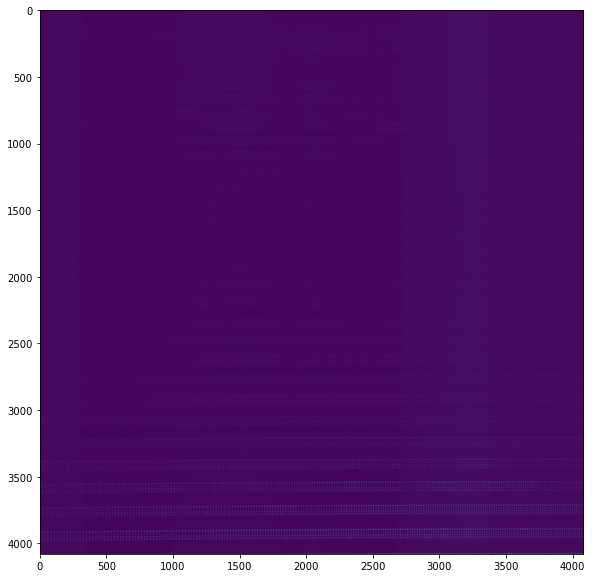

In [164]:
test = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/20220413/KPF_220413_225500_2D.fits')
plt.figure(figsize=(10,10))
plt.imshow(test['RED_CCD'].data)

In [107]:
# tester1 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_193700_lev0_preassembly_L0.fits')
# tester2 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220412_003400_lev0_preassembly_L0.fits')
tester3 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KP.20220412.45046.00_preassembly_L0.fits')

In [108]:
np.where(tester3['RED_CCD'].data > (2**16))

(array([], dtype=int64), array([], dtype=int64))

In [101]:
newdata = tester3['RED_CCD'].data/4096

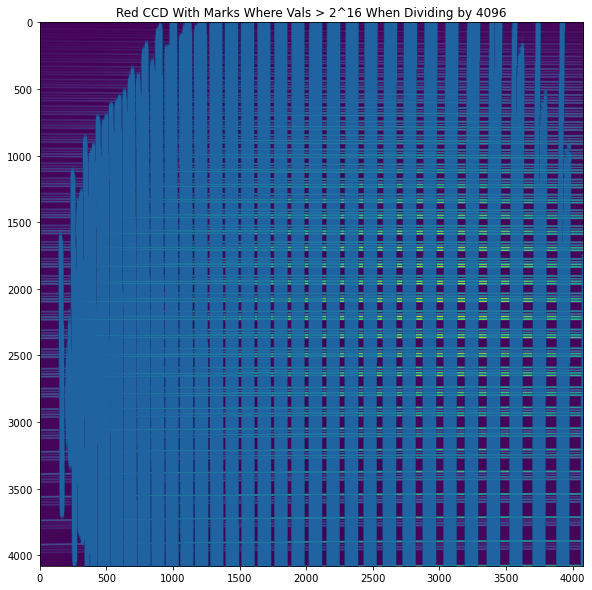

In [100]:
plt.figure(figsize=(10,10))
plt.title('Red CCD With Marks Where Vals > 2^16 When Dividing by 4096')
plt.imshow(tester3['RED_CCD'].data/4096)
plt.scatter(np.where(tester3['RED_CCD'].data/4096>(2**16))[0],np.where(tester3['RED_CCD'].data/4096>(2**16))[1],marker='.',alpha=.05)

(array([[3839.,  191.,   50., ...,    0.,    0.,    0.],
        [3835.,  201.,   44., ...,    0.,    0.,    0.],
        [3839.,  201.,   40., ...,    0.,    0.,    0.],
        ...,
        [3752.,   68.,   77., ...,    0.,    0.,    0.],
        [3754.,   68.,   76., ...,    0.,    0.,    0.],
        [3753.,   68.,   75., ...,    0.,    0.,    0.]]),
 array([ 17082.4230957 ,  28281.9692627 ,  39481.51542969,  50681.06159668,
         61880.60776367,  73080.15393066,  84279.70009766,  95479.24626465,
        106678.79243164, 117878.33859863, 129077.88476562]),
 <a list of 4080 Lists of Patches objects>)

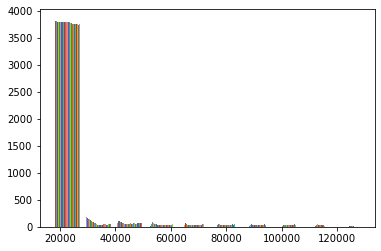

In [67]:
plt.hist(tester1['RED_CCD'].data/4096)

(array([[3839.,  191.,   50., ...,    0.,    0.,    0.],
        [3835.,  201.,   44., ...,    0.,    0.,    0.],
        [3839.,  201.,   40., ...,    0.,    0.,    0.],
        ...,
        [3752.,   68.,   77., ...,    0.,    0.,    0.],
        [3754.,   68.,   76., ...,    0.,    0.,    0.],
        [3753.,   68.,   75., ...,    0.,    0.,    0.]]),
 array([1067.65144348, 1767.62307892, 2467.59471436, 3167.56634979,
        3867.53798523, 4567.50962067, 5267.4812561 , 5967.45289154,
        6667.42452698, 7367.39616241, 8067.36779785]),
 <a list of 4080 Lists of Patches objects>)

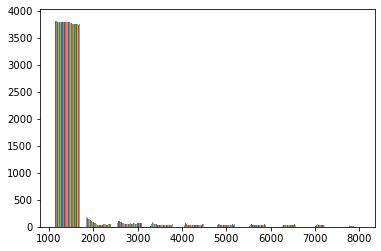

In [68]:
plt.hist(tester1['RED_CCD'].data/2**16)

In [66]:
np.size(np.where(tester1['RED_CCD'].data/4096 > (2**16))[0])

423746

In [56]:
full_size = np.size(tester1['RED_CCD'].data)

In [58]:
tester1['RED_CCD'].data

array([[85197115, 84293948, 87038110, ..., 89585822, 88114727, 87897640],
       [86354551, 86205992, 85185300, ..., 86539972, 86398345, 86434264],
       [83313585, 83547531, 87027082, ..., 87666531, 87223848, 86360379],
       ...,
       [86055542, 85613805, 86762260, ..., 87017787, 88043521, 87255198],
       [85944793, 85311960, 87047561, ..., 87468820, 87201162, 87521753],
       [89684755, 89186460, 91990015, ..., 89119350, 88393413, 87061268]],
      dtype=uint32)

In [57]:
bad_size/full_size

0.05091142829680892

In [46]:
np.median(tester1['RED_CCD'].data/(4096))

20291.461669921875

In [44]:
tester1['RED_AMP1'].data[394,2017]

270347816

In [14]:
cheese = fits.open('/Users/paminabby/Desktop/20220411_red/pre-assembly/KPF_220412_003400_bkgremoved_lev0_preassembly.fits')
cheese.info()

Filename: /Users/paminabby/Desktop/20220411_red/pre-assembly/KPF_220412_003400_bkgremoved_lev0_preassembly.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1  RECEIPT       1 BinTableHDU     29   0R x 10C   [D, D, D, D, D, D, D, D, D, D]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  GREEN_AMP1    1 ImageHDU        22   (0,)      
  4  GREEN_AMP2    1 ImageHDU        22   (0,)      
  5  GREEN_AMP3    1 ImageHDU        22   (0,)      
  6  GREEN_AMP4    1 ImageHDU        22   (0,)      
  7  GREEN_CCD     1 ImageHDU         8   (0,)      
  8  GREEN_VAR     1 ImageHDU         8   (0,)      
  9  RED_AMP1      1 ImageHDU        23   (2144, 4180)   float32   
 10  RED_AMP2      1 ImageHDU        23   (1944, 4180)   float32   
 11  RED_AMP3      1 ImageHDU        22   (0,)      
 12  RED_AMP4      1 ImageHDU        22   (0,)      
 13  RED_CCD       1 ImageHDU         7   (0,)      
 14  RED_VAR 

In [ ]:
### POST-ASSEMBLY DARK SUBTRACTION ###

In [ ]:
### WITH DARK FRAME SUBTRACTION ###
directory = '/Users/paminabby/Desktop/20220411_red/pre-assembly/*'
file_type = '.fits'
kpf_files = glob.glob(directory+file_type)
oscan = 100
prescan = 4
for file in kpf_files:
    obj = KPF0()
    obj.header['RED_AMP1']['CCDGAIN'] = 5.1
    obj.header['RED_AMP2']['CCDGAIN'] = 5.21
    fits_file = fits.open(file)
    fits_file.info()
    #divide into quads
    div_quad1 = fits_file[0].data[0:4080+oscan,0:2040+prescan+oscan]
    div_quad2 = fits_file[0].data[0:4080+oscan,2040+prescan+oscan:4288]
    
    ###dark frame subtraction###
    texp_dark = 30
    texp = 30
    dark1 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_195600_L0.fits')
    dark2 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_195300_L0.fits')
    dark3 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_195000_L0.fits')
    darks = [dark1['RED_CCD'].data, dark2['RED_CCD'].data, dark3['RED_CCD'].data]
    dark_mean = np.mean(darks,axis=0)
    
    div_quad1 -= div_quad1 - dark_mean.astype(np.float32) * (texp/texp_dark)
    div_quad2 -= dark_mean.astype(np.float32) * (texp/texp_dark)
    
    #populate extensions
    obj['RED_AMP1'] = div_quad1
    obj['RED_AMP2'] = div_quad2
    direct,file_name_ext = os.path.split(file)
    file_name,ext = os.path.splitext(file_name_ext)
    output_path = direct + '/' + file_name+'_lev0_preassembly_darkcorr'+ext
    obj.to_fits(output_path)

In [ ]:
# filee = fits.open('/Users/paminabby/Desktop/kpf_lev0_test/kpf_20220329_045044_20220329045044_2amp_L0_apr11.fits')
# filee.info()

In [ ]:
twoamp = fits.open('/Users/paminabby/Desktop/assembled_2amp_apr11_2.fits')
twoamp.info()

In [ ]:
# plt.figure(figsize=(2.5,5))
# plt.imshow(twoamp['RED_AMP1'].data,aspect='auto')
# plt.figure(figsize=(2.5,5))
# plt.imshow(twoamp['RED_AMP2'].data,aspect='auto')
# plt.figure(figsize=(5,5))
# plt.imshow(twoamp['RED_CCD'].data,aspect='auto')

In [ ]:
### SANS DARK FRAME SUBTRACTION ###
directory = '/Users/paminabby/Desktop/kpf_lev0_test/kpf_20220329_045044_20220329045044.fits'
kpf_files = glob.glob(directory)
oscan = 100
prescan = 4
for file in kpf_files:
    obj = KPF0()
    obj.header['RED_AMP1']['CCDGAIN'] = 5.1
    obj.header['RED_AMP2']['CCDGAIN'] = 5.21
    fits_file = fits.open(file)
    fits_file.info()
    #divide into quads
    div_quad1 = fits_file[0].data[0:4080+oscan,0:2040+prescan+oscan]
    div_quad2 = fits_file[0].data[0:4080+oscan,2040+prescan+oscan:4288]
    #populate extensions
    obj['RED_AMP1'] = div_quad1
    obj['RED_AMP2'] = div_quad2
    #output_path = file.split('.')[0]+'_lev0_preassembly'
    direct,file_name_ext = os.path.split(file)
    file_name,ext = os.path.splitext(file_name_ext)
    output_path = direct + '/' + file_name+'_lev0_preassembly'+ext
    obj.to_fits(output_path)

In [ ]:
fits.open('/Users/paminabby/Desktop/kpf_lev0_test/kpf_20220329_045044_20220329045044_lev0_preassembly.fits').info()

In [ ]:
### WITH DARK FRAME SUBTRACTION ###
directory = '/Users/paminabby/Desktop/20220411_red/pre-assembly/*'
file_type = '.fits'
kpf_files = glob.glob(directory+file_type)
oscan = 100
prescan = 4
for file in kpf_files:
    obj = KPF0()
    obj.header['RED_AMP1']['CCDGAIN'] = 5.1
    obj.header['RED_AMP2']['CCDGAIN'] = 5.21
    fits_file = fits.open(file)
    fits_file.info()
    #divide into quads
    div_quad1 = fits_file[0].data[0:4080+oscan,0:2040+prescan+oscan]
    div_quad2 = fits_file[0].data[0:4080+oscan,2040+prescan+oscan:4288]
    
    ###dark frame subtraction###
    texp_dark = 
    dark1 = 
    dark2 = 
    dark3 = 
    darks = [dark1[0].data, dark2[0].data, dark3[0].data]
    dark_mean = np.mean(darks,axis=0)
    
    div_quad1 -= dark.astype(np.float32) * (texp/texp_dark)
    div_quad2 -= dark.astype(np.float32) * (texp/texp_dark)
    
    #populate extensions
    obj['RED_AMP1'] = div_quad1
    obj['RED_AMP2'] = div_quad2
    output_path = file.split('.')[0]+'_lev0_preassembly'
    print(output_path)
    obj.to_fits(output_path + file_type)

In [ ]:
filee = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_193700_L0.fits')

In [ ]:
filee.info()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(filee[13].data,aspect='auto')

In [153]:
fitss = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/20220415/KPF_220416_003100_2D.fits')

In [154]:
fitss.info()

Filename: /Users/paminabby/Desktop/20220411_red/post-assembly/20220415/KPF_220416_003100_2D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1  RECEIPT       1 BinTableHDU     29   1R x 10C   [26A, 6A, 12A, 40A, 3A, 9A, 1A, 21A, 40A, 4A]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  GREEN_AMP1    1 ImageHDU        22   (0,)      
  4  GREEN_AMP2    1 ImageHDU        22   (0,)      
  5  GREEN_AMP3    1 ImageHDU        22   (0,)      
  6  GREEN_AMP4    1 ImageHDU        22   (0,)      
  7  GREEN_CCD     1 ImageHDU         8   (0,)      
  8  GREEN_VAR     1 ImageHDU         8   (0,)      
  9  RED_AMP1      1 ImageHDU        25   (2144, 4180)   int32 (rescales to uint32)   
 10  RED_AMP2      1 ImageHDU        25   (2144, 4180)   int32 (rescales to uint32)   
 11  RED_AMP3      1 ImageHDU        22   (0,)      
 12  RED_AMP4      1 ImageHDU        22   (0,)      
 13  RED_CCD       1 ImageHD

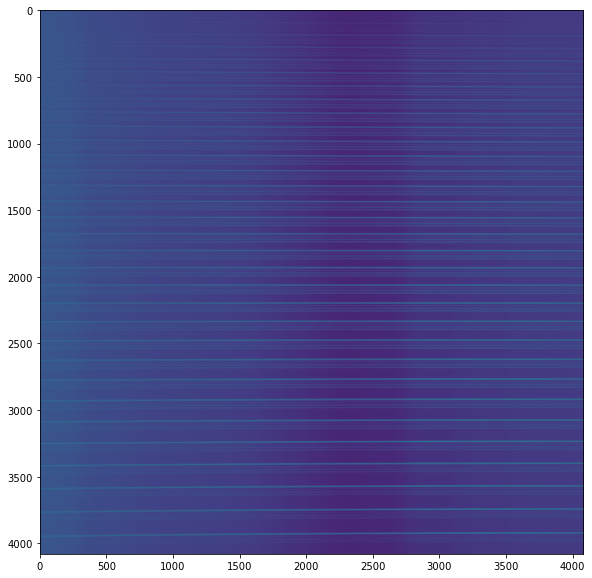

In [155]:
plt.figure(figsize=(10,10))
plt.imshow(fitss['RED_CCD'].data)